In [1]:
import tensorflow as tf

In [2]:
fmnist= tf.keras.datasets.fashion_mnist
(train_image,train_labels), (test_image,test_labels)= fmnist.load_data()

In [3]:
(X_train,y_train), (X_test,y_test) = fmnist.load_data()
assert X_train.shape==(60000,28,28)
assert X_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

In [4]:
# sammarize loaded dataset
print('Train:X=%s, y=%s' % (X_train.shape,y_train.shape))
print('Test:X=%s, y=%s' % (X_test.shape,y_test.shape))

Train:X=(60000, 28, 28), y=(60000,)
Test:X=(10000, 28, 28), y=(10000,)


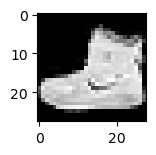

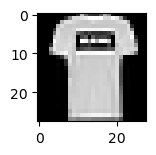

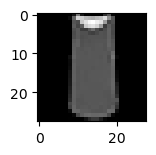

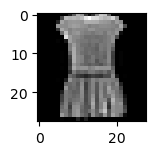

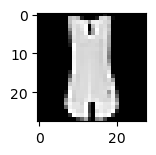

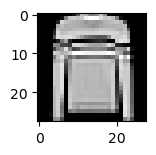

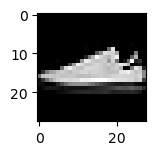

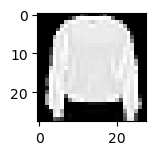

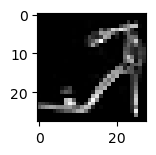

In [5]:
# plot first few image
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    # show the fig
    plt.show()

In [6]:
X_train= X_train / 255.0
X_test= X_test / 255.0

In [7]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])
# compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
# train the model
model.fit(X_train,y_train,epochs=10)

# Evalueate the model
test_loss,test_acc= model.evaluate(X_test,y_test)
print("Test accuracy:",test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4942 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3723 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3355 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2816 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2468 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3267 

In [9]:
# make prediction with model
predictions= model.predict(X_test)

# print the shape of prediction array
print(predictions.shape)

# print the first ten prediction
print(predictions[:10])

# convert the prediction to class to labels
class_labels= [tf.argmax(prediction) for prediction in predictions]

# print the first 10 class labels
print(class_labels[:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[1.13477083e-09 2.66769357e-10 2.41169279e-10 1.90582654e-11
  5.86028934e-11 1.32647241e-04 7.48908846e-09 1.64476200e-03
  1.46853847e-06 9.98221099e-01]
 [4.53685570e-05 1.24739238e-11 9.95261133e-01 5.22366872e-10
  1.19821273e-03 1.80742987e-09 3.49520799e-03 3.01806733e-16
  2.59727511e-08 1.23525122e-11]
 [7.10731115e-07 9.99999285e-01 3.76476107e-12 6.22295659e-10
  6.82047405e-11 3.38598476e-17 3.46768197e-10 1.20325378e-26
  9.78218767e-14 1.01882668e-18]
 [8.07342360e-07 9.99998212e-01 1.46732537e-09 9.82532356e-07
  1.02222151e-08 2.65148472e-13 3.91335462e-08 1.14833788e-22
  6.32885454e-12 1.44238971e-14]
 [1.67154029e-01 3.67507766e-07 9.40953288e-03 5.10579906e-04
  2.24273070e-03 2.98654959e-05 8.20507050e-01 1.33284146e-07
  8.45850591e-05 6.11539144e-05]
 [4.51977212e-05 9.99954462e-01 1.18936088e-08 2.06368078e-08
  1.74832238e-08 2.87667812e-13 2.57247535e-07 2.75031369e-23
  3.78560291e-12 9.38671

Epoch 1/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5108 - accuracy: 0.8207 - val_loss: 0.4121 - val_accuracy: 0.8502
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3844 - accuracy: 0.8607 - val_loss: 0.3679 - val_accuracy: 0.8682
Epoch 3/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3406 - accuracy: 0.8758 - val_loss: 0.3259 - val_accuracy: 0.8820
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3164 - accuracy: 0.8833 - val_loss: 0.3115 - val_accuracy: 0.8888
Epoch 5/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2991 - accuracy: 0.8896 - val_loss: 0.3333 - val_accuracy: 0.8766
Epoch 6/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2821 - accuracy: 0.8964 - val_loss: 0.3118 - val_accuracy: 0.8878
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2690 - accuracy: 0.9003 - val_loss: 0.3309 - val_accuracy:

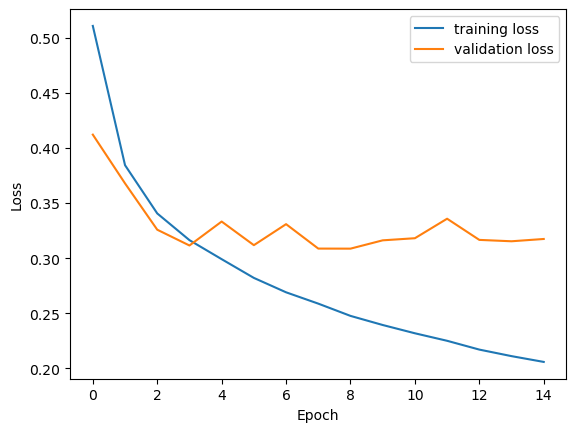

In [10]:
# Complete model in one code

# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# load the Fashion MNIST dataset
(X_train,y_train), (X_test,y_test) = fmnist.load_data()

# Preprocess the data
X_train= X_train / 255.0
X_test= X_test / 255.0

# Split the traning data into training and validation sets
X_val= X_train[:5000]
y_val= y_train[:5000]
X_train= X_train[5000:]
y_train= y_train[5000:]

# Build the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

# compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# train the model
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_val,y_val))

# Plot the training and validation loss
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

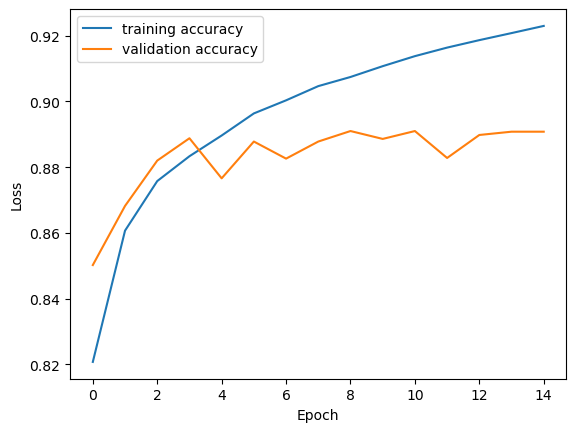

In [11]:
# # Plot the training and validation accuracy
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Evaluate the model on the test data
test_loss,test_acc= model.evaluate(X_test,y_test)
print('Test loss:',test_loss)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8846
Test loss: 0.34859052300453186
Test accuracy: 0.8845999836921692
